# Imports

In [1]:
import pandas as pd
import numpy as np
import json
import torch
import torch.nn as nn
import sys
sys.path.insert(0,'../../')

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [3]:
#save a slice
filename = 'jokes_dataset.csv'
raw_df = pd.read_csv('../data/'+filename, sep=',',
                encoding='utf-8').set_index('id')

# work with copy
df = raw_df.copy(deep=True)

# Preprocessing

In [4]:
from src import schema as S
from src.preprocessing.preprocessing import SimplePreprocessor
from bs4 import BeautifulSoup

preprocessor = SimplePreprocessor()

# Dataset augmenting

In [5]:
import nlpaug.augmenter.word as naw

aug_syn = naw.SynonymAug(aug_src='wordnet', aug_min=1, aug_max=1)

In [6]:
from src.augmenting.augmenting import Augmenter

augmenter = Augmenter(aug_syn)

# Dataset convertor

In [7]:
from src.text2seq.convertor import Text2SeqConvertor

convertor = Text2SeqConvertor()

# Model

In [8]:
# from src.models.CNN_simple import JokeRankPredictor

# JokeRankPredictor

# Pipline

In [9]:
from src.pipeline.pipeline import Pipeline

pipeline = Pipeline(
                 preprocessor = preprocessor,
                 augmenter = augmenter,   ###############################
                 convertor = convertor,
                 model_name = 'JokeRankPredictor', 
                 splitting_params = {'test_size': 0.2,
                                     'shuffle': True},
                 )


In [10]:
 %%time
train_df, val_df, test_df = pipeline.prepare_data(df)

DEBUG:pipeline-log:Starting preprocessing
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:pipeline-log:Splitting dataset on train, val and test
DEBUG:pipeline-log:Augment text for train
DEBUG:pipeline-log:Make vocabulary
DEBUG:pipeline-log:Split data to train/val/test after making vocabulary
Wall time: 9min 45s


In [11]:
train_df.shape, val_df.shape ,test_df.shape

((243270, 3), (30409, 3), (38012, 3))

# Train

In [13]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam

In [14]:
iteration_list, loss_list, accuracy_list = pipeline.train_model(learning_rate,
                                                               criterion,
                                                               optimizer,
                                                               train_df,
                                                               val_df,
                                                               epochs=5,
                                                               checkpoint_path='../checkpoints/cnn_simple_best_checkpoint')

INFO:pipeline-log:Fitting model
Epoch 0


  0%|          | 0/1900 [00:00<?, ?it/s]

Iteration: 99  Loss: 1.6019805669784546  Accuracy: 31.49725341796875 %
Saving model and optimizer state at iteration 99 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 199  Loss: 1.5758213996887207  Accuracy: 32.33582305908203 %
Saving model and optimizer state at iteration 199 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 299  Loss: 1.5667272806167603  Accuracy: 32.55944061279297 %
Saving model and optimizer state at iteration 299 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 399  Loss: 1.5566056966781616  Accuracy: 32.569305419921875 %
Saving model and optimizer state at iteration 399 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 499  Loss: 1.5303009748458862  Accuracy: 32.76990509033203 %
Saving model and optimizer state at iteration 499 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 599  Loss: 1.5592814683914185  Accuracy: 33.40787124633789 %
Saving model and optimizer state at iteration 599 to ../checkpoints/cnn_simple_best_checkpoint

  0%|          | 0/1900 [00:00<?, ?it/s]

Iteration: 1999  Loss: 1.5510821342468262  Accuracy: 33.08559799194336 %
Iteration: 2099  Loss: 1.529674768447876  Accuracy: 32.98365783691406 %
Iteration: 2199  Loss: 1.5850231647491455  Accuracy: 32.592323303222656 %
Iteration: 2299  Loss: 1.4959716796875  Accuracy: 32.6646728515625 %
Iteration: 2399  Loss: 1.534298062324524  Accuracy: 33.18754196166992 %
Iteration: 2499  Loss: 1.555878758430481  Accuracy: 32.53313064575195 %
Iteration: 2599  Loss: 1.5760353803634644  Accuracy: 32.69097900390625 %
Iteration: 2699  Loss: 1.566107153892517  Accuracy: 33.19083023071289 %
Iteration: 2799  Loss: 1.5209163427352905  Accuracy: 33.18754196166992 %
Iteration: 2899  Loss: 1.5269858837127686  Accuracy: 33.14479446411133 %
Iteration: 2999  Loss: 1.5158004760742188  Accuracy: 32.7238655090332 %
Iteration: 3099  Loss: 1.546591877937317  Accuracy: 33.138214111328125 %
Iteration: 3199  Loss: 1.5371711254119873  Accuracy: 32.921173095703125 %
Iteration: 3299  Loss: 1.503673791885376  Accuracy: 32.901

  0%|          | 0/1900 [00:00<?, ?it/s]

Iteration: 3899  Loss: 1.5706671476364136  Accuracy: 32.9409065246582 %
Iteration: 3999  Loss: 1.52548086643219  Accuracy: 32.51668930053711 %
Iteration: 4099  Loss: 1.5851032733917236  Accuracy: 32.75674819946289 %
Iteration: 4199  Loss: 1.5645406246185303  Accuracy: 33.17110061645508 %
Iteration: 4299  Loss: 1.5202101469039917  Accuracy: 33.115196228027344 %
Iteration: 4399  Loss: 1.5078099966049194  Accuracy: 33.220428466796875 %
Iteration: 4499  Loss: 1.5171246528625488  Accuracy: 32.825809478759766 %
Iteration: 4599  Loss: 1.5205732583999634  Accuracy: 33.072444915771484 %
Iteration: 4699  Loss: 1.5507105588912964  Accuracy: 33.31250762939453 %
Iteration: 4799  Loss: 1.5418040752410889  Accuracy: 33.046138763427734 %
Iteration: 4899  Loss: 1.5637669563293457  Accuracy: 32.84225082397461 %
Iteration: 4999  Loss: 1.4874184131622314  Accuracy: 32.4476318359375 %
Iteration: 5099  Loss: 1.563403844833374  Accuracy: 32.95734786987305 %
Iteration: 5199  Loss: 1.4977786540985107  Accuracy

  0%|          | 0/1900 [00:00<?, ?it/s]

Iteration: 5799  Loss: 1.531663179397583  Accuracy: 32.76003646850586 %
Iteration: 5899  Loss: 1.517944574356079  Accuracy: 33.180965423583984 %
Iteration: 5999  Loss: 1.593370795249939  Accuracy: 33.0494270324707 %
Iteration: 6099  Loss: 1.561374545097351  Accuracy: 33.154659271240234 %
Iteration: 6199  Loss: 1.561737298965454  Accuracy: 32.855403900146484 %
Iteration: 6299  Loss: 1.5567033290863037  Accuracy: 32.64165115356445 %
Iteration: 6399  Loss: 1.5112175941467285  Accuracy: 32.58903503417969 %
Iteration: 6499  Loss: 1.5631791353225708  Accuracy: 32.91459655761719 %
Iteration: 6599  Loss: 1.528849482536316  Accuracy: 33.20398712158203 %
Iteration: 6699  Loss: 1.5869174003601074  Accuracy: 33.19740676879883 %
Iteration: 6799  Loss: 1.5088310241699219  Accuracy: 33.358543395996094 %
Iteration: 6899  Loss: 1.5470209121704102  Accuracy: 33.60189437866211 %
Saving model and optimizer state at iteration 6899 to ../checkpoints/cnn_simple_best_checkpoint
Iteration: 6999  Loss: 1.478323

  0%|          | 0/1900 [00:00<?, ?it/s]

Iteration: 7699  Loss: 1.5283787250518799  Accuracy: 33.13163757324219 %
Iteration: 7799  Loss: 1.534719705581665  Accuracy: 33.30263900756836 %
Iteration: 7899  Loss: 1.523886799812317  Accuracy: 33.27633285522461 %
Iteration: 7999  Loss: 1.536974310874939  Accuracy: 33.506526947021484 %
Iteration: 8099  Loss: 1.5275851488113403  Accuracy: 33.434181213378906 %
Iteration: 8199  Loss: 1.5750665664672852  Accuracy: 33.37827682495117 %
Iteration: 8299  Loss: 1.5581483840942383  Accuracy: 33.23358154296875 %
Iteration: 8399  Loss: 1.5028340816497803  Accuracy: 33.29935073852539 %
Iteration: 8499  Loss: 1.4911181926727295  Accuracy: 33.28290939331055 %
Iteration: 8599  Loss: 1.5495879650115967  Accuracy: 33.17110061645508 %
Iteration: 8699  Loss: 1.5238028764724731  Accuracy: 32.98036575317383 %
Iteration: 8799  Loss: 1.4844239950180054  Accuracy: 33.111907958984375 %
Iteration: 8899  Loss: 1.5658910274505615  Accuracy: 33.111907958984375 %
Iteration: 8999  Loss: 1.5471289157867432  Accurac

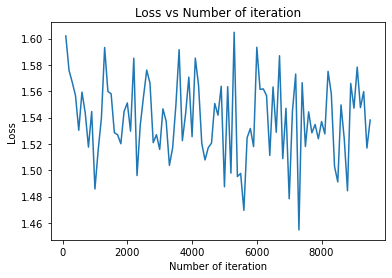

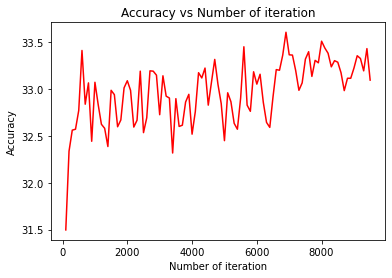

In [15]:
pipeline.draw_curves(iteration_list, loss_list, accuracy_list)

# Predict

pred = pipeline.predict(test_df, checkpoint_path='../checkpoints/cnn_simple_best_checkpoint')

In [16]:
pred = pipeline.predict(test_df, checkpoint_path='../checkpoints/cnn_simple_best_checkpoint')

INFO:pipeline-log:Starting prediction
Loading checkpoint '../checkpoints/cnn_simple_best_checkpoint'
Loaded checkpoint '../checkpoints/cnn_simple_best_checkpoint' from iteration 6899


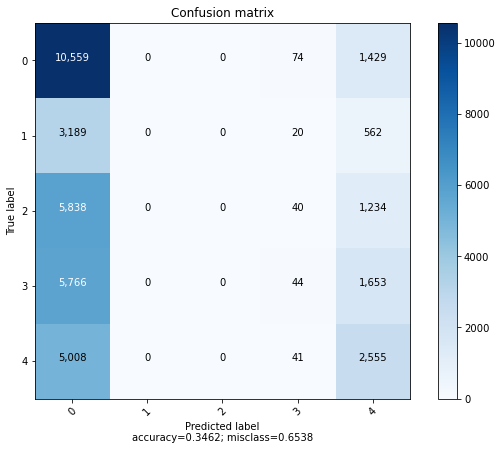

Accuracy: 0.34615 
Balanced accuracy: 0.24346 
Multiclass f1-score: 
    micro: 0.34615 
    macro: 0.16982 
    weighted: 0.22819


Classification report:

              precision    recall  f1-score   support

           0    0.34779   0.87539   0.49781     12062
           1    0.00000   0.00000   0.00000      3771
           2    0.00000   0.00000   0.00000      7112
           3    0.20091   0.00590   0.01146      7463
           4    0.34374   0.33601   0.33983      7604

    accuracy                        0.34615     38012
   macro avg    0.17849   0.24346   0.16982     38012
weighted avg    0.21857   0.34615   0.22819     38012



In [17]:
pipeline.get_scores(test_df[S.TARGET].values, pred)